In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from autorocks.data.loader.all_models_result_aggregator import create_all_models_comparison_dataset
from autorocks.dir_struct import PackageRootDir
import autorocks.viz.viz as viz


_DIM_TO_ITER = {25: 100, 50: 125, 100: 200, 300: 500}
main_target = "target"
output_path = "/Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/levy"

In [3]:
import seaborn as sns

comparison_models = ["BoBn", "GP", "Additive", "TuRBO-1", "Random", "TPE", "PBTTuner", "SMAC"]
palette = sns.color_palette("pastel", n_colors=8)
color_palette = viz.create_color_palette_for_list_df(comparison_models, palette)

/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(model_data.sys_params, ignore_index=True)
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_perf = model_perf.append(model_data.model_performance, ignore_index=True)
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sys_observations = sys_observations.append(
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.appen

Creating:  /Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/levy/25levy.pdf


findfont: Font family ['Arial'] not found. Falling back to Helvetica.
findfont: Font family ['Arial'] not found. Falling back to Helvetica.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_

Creating:  /Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/levy/50levy.pdf


/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(model_data.sys_params, ignore_index=True)
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_perf = model_perf.append(model_data.model_performance, ignore_index=True)
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sys_observations = sys_observations.append(
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.appen

Creating:  /Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/levy/100levy.pdf


/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(model_data.sys_params, ignore_index=True)
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_perf = model_perf.append(model_data.model_performance, ignore_index=True)
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sys_observations = sys_observations.append(
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.appen

Creating:  /Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/levy/300levy.pdf


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


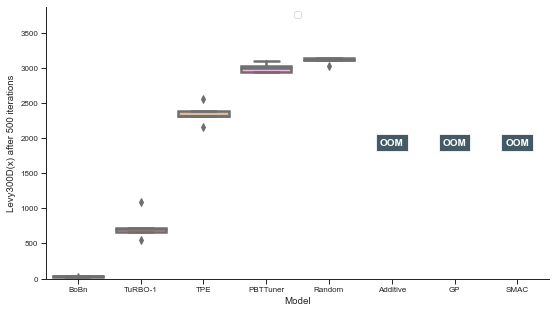

In [4]:
import numpy as np 

for (dim, itr) in _DIM_TO_ITER.items():
    all_model = create_all_models_comparison_dataset(
        PackageRootDir / f"ProcessedDataNew/Levy{dim}D/target/{dim}_params/{itr}_iter/", save_results = False)
    model_comparison_data_c = viz.unify_model_name(all_model)
    perf_df = model_comparison_data_c.sys_observations
    perf_df.loc[perf_df['model'] == "BoTorch_SingleTaskGP", "model"] = "GP"
    perf_df.loc[perf_df['model'] == "BoTorch_AdditiveModel", "model"] = "Additive"
    perf_df.loc[perf_df['model'] == "BoTorch_TurboModel", "model"] = "TuRBO-1"
    for comparison_model in comparison_models:
        if not (perf_df['model'] == comparison_model).any():
            perf_df = perf_df.append({"model": comparison_model, main_target: np.nan}, ignore_index=True)
            
        
    print("Creating: ", f"{output_path}/{dim}levy.pdf")
    max_value = perf_df.groupby("model")['target'].mean().max()
    oom_max_value = max_value + 1000
    df_numeric = perf_df.replace(np.nan, oom_max_value)
    iops_fig = viz.perf_boxplot(
        perf_df = df_numeric,
        optimization_type = viz.OptimizationType.MINIMIZE,
        ylabel = f"Levy{dim}D(x) after {itr} iterations",
        comparison_col = main_target,
        model_palette_map = color_palette,
        # horizontal_line = 0,
        fig_size = (9, 5),
        # add_roi = True
    )
    ax = iops_fig.axes[0]
    last_value_not_oom = None
    for tick, label in zip(ax.get_xticks(), ax.get_xticklabels()):
        if (perf_df[perf_df['model'] == label.get_text()]['target']).isna().any():
            iops_fig.axes[0].text(
                tick,
                max_value/2,
                f"OOM",
                ha="center",
                va="center",
                fontweight="bold",
                size=10,
                color="white",
                bbox=dict(facecolor="#445A64"),
            )
    
    iops_fig.axes[0].set(ylim=(0, max_value))
    
    
    iops_fig.savefig(f"{output_path}/{dim}levy.pdf", bbox_inches='tight')
    iops_fig.savefig(f"{output_path}/{dim}levy.svg", bbox_inches='tight')
iops_fig


In [5]:
import pandas as pd 


for (dim, itr) in _DIM_TO_ITER.items():
    all_model = create_all_models_comparison_dataset(
        PackageRootDir / f"ProcessedDataNew/Levy{dim}D/target/{dim}_params/{itr}_iter/", save_results = False)
    model_comparison_data_c = viz.unify_model_name(all_model)
    perf_df = model_comparison_data_c.sys_observations
    perf_df.loc[perf_df['model'] == "BoTorch_SingleTaskGP", "model"] = "GP"
    perf_df.loc[perf_df['model'] == "BoTorch_AdditiveModel", "model"] = "Additive"
    perf_df.loc[perf_df['model'] == "BoTorch_TurboModel", "model"] = "TuRBO-1"
    for comparison_model in comparison_models:
        if not (perf_df['model'] == comparison_model).any():
            perf_df = perf_df.append({"model": comparison_model, main_target: np.nan}, ignore_index=True)
            
        
    print("Creating: ", f"{output_path}/{dim}levy.pdf")
    max_value = perf_df.groupby("model")['target'].mean().max()
    oom_max_value = max_value + 1000
    df_numeric = perf_df.replace(np.nan, oom_max_value)
    iops_fig = viz.perf_boxplot(
        perf_df = df_numeric,
        optimization_type = viz.OptimizationType.MINIMIZE,
        ylabel = f"Levy{dim}D(x) after {itr} iterations",
        comparison_col = main_target,
        model_palette_map = color_palette,
        # horizontal_line = 0,
        fig_size = (9, 5),
        # add_roi = True
    )
    ax = iops_fig.axes[0]
    last_value_not_oom = None
    for tick, label in zip(ax.get_xticks(), ax.get_xticklabels()):
        if (perf_df[perf_df['model'] == label.get_text()]['target']).isna().any():
            iops_fig.axes[0].text(
                tick,
                max_value/2,
                f"OOM",
                ha="center",
                va="center",
                fontweight="bold",
                size=10,
                color="white",
                bbox=dict(facecolor="#445A64"),
            )
    
    iops_fig.axes[0].set(ylim=(0, max_value))
    
    
    iops_fig.savefig(f"{output_path}/{dim}levy.pdf", bbox_inches='tight')
    iops_fig.savefig(f"{output_path}/{dim}levy.svg", bbox_inches='tight')
        
    convergence_df = perf_df.copy()
    convergence_df = convergence_df[convergence_df['step'] > 11]
    convergence_df["rolling"] = (
        convergence_df[[main_target, "model", "iteration"]]
        .groupby(["model", "iteration"])
        [main_target]
        .agg(f"cum{str(viz.OptimizationType.MINIMIZE)}")
    )
    
    
    # Impute missing x-axis due to early stopping    
    all_models_last_step = int(convergence_df['step'].max())
    bobn_df = convergence_df[convergence_df['model'] == "BoBn"]
    iteration =int(bobn_df['iteration'].max())
    last_step = int(bobn_df['step'].max())
    last_val = bobn_df[bobn_df['step'] == last_step]['rolling'].values
    missing_df = []
    for i, val in enumerate(last_val):
        for s in range(last_step+1, all_models_last_step):
            missing_df.append({"model": "BoBn", "iteration": i, "step": s, "rolling": val})
    missing_df = pd.DataFrame(missing_df)
    convergence_df = pd.concat([convergence_df,  missing_df])
    

    conv_fig = viz.convergence_lineplot(
        df=convergence_df,
        optimization_type=viz.OptimizationType.MINIMIZE,
        ylabel=main_target,
        column_name="rolling",
        model_palette_map=color_palette,
        fig_size=(9, 5),
    )
    conv_fig.axes[0].set(xlim=(5, None))
      
    conv_fig.savefig(f"{output_path}/{dim}levy_conv.pdf", bbox_inches='tight')
    conv_fig.savefig(f"{output_path}/{dim}levy_conv.svg", bbox_inches='tight')

/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(model_data.sys_params, ignore_index=True)
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_perf = model_perf.append(model_data.model_performance, ignore_index=True)
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sys_observations = sys_observations.append(
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.appen

Creating:  /Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/levy/25levy.pdf


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

Creating:  /Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/levy/50levy.pdf


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/Users/salabed/workspace/autorocks/autorocks/data/loader/

Creating:  /Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/levy/100levy.pdf


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

Creating:  /Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/levy/300levy.pdf


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


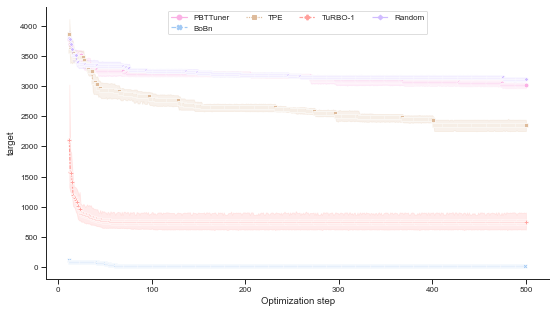

In [6]:
convergence_df = perf_df.copy()

convergence_df = convergence_df[convergence_df['step'] > 11]


convergence_df["rolling"] = (
    convergence_df[[main_target, "model", "iteration", 'step']]
    .groupby(["model", "iteration"])
    [main_target]
    .cummin()
)

all_models_last_step = int(convergence_df['step'].max())
bobn_df = convergence_df[convergence_df['model'] == "BoBn"]
iteration =int(bobn_df['iteration'].max())
last_step = int(bobn_df['step'].max())
last_val = bobn_df[bobn_df['step'] == last_step]['rolling'].values
missing_df = []
for i in range(iteration):
    for s in range(last_step+1, all_models_last_step):
        missing_df.append({"model": "BoBn", "iteration": i, "step": s, "rolling": last_val[i]})
missing_df = pd.DataFrame(missing_df)
convergence_df = pd.concat([convergence_df,  missing_df])


conv_fig = viz.convergence_lineplot(
    df=convergence_df,
    optimization_type=viz.OptimizationType.MINIMIZE,
    ylabel=main_target,
    column_name="rolling",
    model_palette_map=color_palette,
    fig_size=(9, 5),
)
conv_fig

In [301]:
len(last_val)

4

In [288]:


iteration =int(test['iteration'].max())
last_step = int(test['step'].max())
last_val = test[test['step'] == last_step]['target'].values

missing_df = []

for i in range(iteration+1):
    for s in range(last_step+1, 500):
        missing_df.append({"model": "BoBn", "iteration": i, "step": s, main_target: last_val[i]})
        
# missing_df = pd.DataFrame(missing_df)

In [292]:
last_step

499